<a href="https://colab.research.google.com/github/BhanuHarshaY/Employee-Attrition-Predection/blob/main/MID_TERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MID TERM|EMPLOYEE ATTRITION DETECTION|AUTHOR: BHANU HARSHA Y | DT: 10/03/25**

# **Overview of the topic & Goal:**
Employee attrition, commonly referred to as "Employee turnover," represents a critical challenge in HR management in any most of the companies. where organizations lose valuable talent due to voluntary resignations often exceeding 15-20% annually. This project leverages supervised classification techniques on a  HR dataset to approach to predict attrition risks by analyzing HR metrics such as demographics(distance from home etc.), job satisfaction(work life balance, work environment satisfaction etc.), and tenure(years at company, years since last promotion etc.).

---



In [ ]:
# Importing all the necessary libraries required for this mid term

#to ignore any warnings
import warnings
warnings.filterwarnings('ignore')

#for data handling
import pandas as pd
import numpy as np

#for EDA and data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for data pre processing and data splitting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

#for feature selection
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

#for model training
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb

#for metric evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#setting plot style
plt.style.use('default')
sns.set_palette('pastel')
sns.set_style('whitegrid')
sns.set_palette('rocket')
sns.set_palette('husl')





## **Q1) DATA COLLECTION AND UNDERSTANDING THE DATASET:**
1.   Here we will load the data in to a dataframe(df) and  read the dataset from the provided input data file **"employee_attrition_dataset.csv"** using *Pandas library*. And then basic details of samples and feature characterstics will be discussed in the following code block.

2. Make sure that you have already uploaded the file **employee_attrition_dataset.csv** to the Google Colab environment before running the below cell.


Loading the dataset into a DF.

Dataset got loaded successfully: 
      Employee_ID  Age  Gender Marital_Status Department   Job_Role  \
0               1   58    Male         Single    Finance    Manager   
1               2   48  Female       Divorced         HR  Assistant   
2               3   34  Female        Married  Marketing    Manager   
3               4   27  Female       Divorced         HR    Manager   
4               5   40    Male        Married         HR    Analyst   
...           ...  ...     ...            ...        ...        ...   
9995         9996   22  Female       Divorced  Marketing    Manager   
9996         9997   35  Female       Divorced  Marketing  Executive   
9997         9998   23    Male       Divorced         IT    Manager   
9998         9999   42  Female         Single  Marketing    Manager   
9999        10000   39  Female       Divorced    Finance  Executive   

      Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  ...  Overtime  \

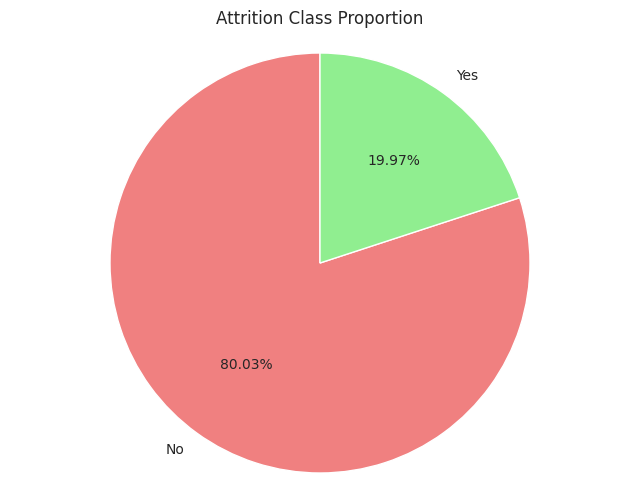


FEATURE CATEGORY SEGREGATION

Categorical Features present in the dataset (6): ['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime', 'Attrition']

Numerical Features present in the dataset (20): ['Employee_ID', 'Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company', 'Years_in_Current_Role', 'Years_Since_Last_Promotion', 'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating', 'Training_Hours_Last_Year', 'Project_Count', 'Average_Hours_Worked_Per_Week', 'Absenteeism', 'Work_Environment_Satisfaction', 'Relationship_with_Manager', 'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked']

Binary Features present in the dataset (0): []

STATSTICAL INFORMATION OF THE DATASET

       Employee_ID           Age     Job_Level  Monthly_Income   Hourly_Rate  \
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000   
mean    5000.50000     39.561800      2.990800    11436.716700     57.032300   
std     2886.89568     11.4549

In [ ]:
#Q1: DATASET ANALYSIS

print(f"\nLoading the dataset into a DF.")
df = pd.read_csv('employee_attrition_dataset.csv')
print(f"\nDataset got loaded successfully: ")
print(df)

print("\nDATASET OVERVIEW")
print(f"\nDataset Shape: {df.shape}")
print(f"\nNo of rows[SAMPLES] present in the dataset: {df.shape[0]:,}")
print(f"\nNumber of columns[FEATURES] present in the dataset: {df.shape[1]}")

print(f"\nDataset is LABELED with target class being  ATTRITION.")

#Feature type
print("\nDATA TYPE OF EACH FEATURE PRESENT IN THE DATASET:")
print(df.dtypes)



# Class distribution
print(f"\nATTRITION CLASS DISTRIBUTION: ")
classDistribution = df['Attrition'].value_counts()
classPercentage = df['Attrition'].value_counts(normalize=True) * 100
classRatio = classDistribution['Yes'] / classDistribution['No']
print(f"\nNO Attrition: {classDistribution['No']:,} samples ({classPercentage['No']:.2f}%)")
print(f"\nYES Attrition: {classDistribution['Yes']:,} samples ({classPercentage['Yes']:.2f}%)")
print(f"\nClass Imbalance Ratio (Minority class/Majority class): {classRatio:.3f}")
#minority/majority class detection
if classRatio < 0.8:
    majorityClass = 0
    minorityClass = 1
    print("YES attrition is the minority class and NO attrition is the majority class.")
elif classRatio > 1.25:
    majorityClass = 1
    minorityClass = 0
    print("NO attrition is the minority and YES attrition is the majority class.")
else:
    print("Both classes are equally balanced")

#class distribution visualisation
# Plot pie chart
labels = list(classDistribution.index)
sizes = list(classDistribution.values)
colors = ['lightcoral', 'lightgreen']
plt.figure(figsize=(8, 6))
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Attrition Class Proportion')
plt.axis('equal')
plt.show()

#Feature segregation
print("\nFEATURE CATEGORY SEGREGATION")
categoricalFeatures = []
numericalFeatures = []
binaryFeatures = []

for col in df.columns:
    if df[col].dtype == 'object':
        categoricalFeatures.append(col)
    else:
        if df[col].nunique() == 2:
            binaryFeatures.append(col)
        else:
            numericalFeatures.append(col)

print(f"\nCategorical Features present in the dataset ({len(categoricalFeatures)}): {categoricalFeatures}")
print(f"\nNumerical Features present in the dataset ({len(numericalFeatures)}): {numericalFeatures}")
print(f"\nBinary Features present in the dataset ({len(binaryFeatures)}): {binaryFeatures}")

#Stats of the dataset
print("\nSTATSTICAL INFORMATION OF THE DATASET")
print(f"\n{df.describe()}")

## **Q1 ANALYSIS:**

# 1.   **What dataset did you use? How many samples? Labeled? Unlabeled? Features?**
**Answer:**

*   I have used **`Employee Attrition Prediction Dataset`** from kaggle, [dataset link.](https://www.kaggle.com/datasets/ziya07/employee-attrition-prediction-dataset)
*  The **`employee_attrition_dataset.csv`** contains 10,000 samples and 26 features.
*   The dataset is **`LABELED`** with the target class  **`attrition(yes/no)`**.


# 2.   **What type of data, and what is your data about?**
**Answer:**

*   The data is `tabular(.csv)` and `labeled` for **`supervised classification`**.
*   The data is about a **company's employee HR information**.
*   Each `row` represents `single employee information`, and each` column` represents a `HR feature` like job satisfaction, tenure, department etc.
* The main goal is to predict if an employee leaves the company or not based on the employee response to the HR factors.
# 3.   **If it is labeled, how many samples do you have in minority and majority class of the data?**
**Answer:**
* Yes, The datset is **labeled**.
* **Total samples present in the dataset:** 10,000
* **Majority Class:** `No attrition` with **8,003 samples (80.03%)**.
* **Minority Class:** `Yes attrition` with **1,997 samples (19.97%)**.
* Hence, the dataset exhibits a high degree of `imbalance`.
# 4.   **Provide a brief description of the features, and a link to the data.**
**Answer:**
* The [dataset](https://www.kaggle.com/datasets/ziya07/employee-attrition-prediction-dataset/data) contains `26 features` in total.
* **Employee_ID:** Unique identifier for each employee.
* **Age:** Age of the employee.
* **Gender:** Gender of the employee.
* **Marital_Status:** Marital status of the employee (Single, Married, Divorced).
* **Department:** Department the employee works in (e.g., HR, IT, Sales, Marketing).
* **Job_Role:** Specific role within the department (e.g., Manager, Analyst).
* **Job_Level:** Level in the organizational hierarchy.
* **Monthly_Income:** Monthly salary of the employee.
* **Hourly_Rate:** Rate per hour for hourly employees.
* **Years_at_Company:** Number of years the employee has been with the company.
* **Years_in_Current_Role:** Number of years the employee has been in their current role.
* **Years_Since_Last_Promotion:** Time since the employee’s last promotion.
* **Work_Life_Balance:**  Rating of work-life balance.
* **Job_Satisfaction:**  Rating of job satisfaction (1-5 scale).
* **Performance_Rating:** Performance rating (1-5 scale).
* **Training_Hours_Last_Year:** Number of training hours completed in the past year.
* **Overtime:** Whether the employee works overtime (Yes/No).
* **Project_Count:** Number of projects managed by the employee.
* **Average_Hours_Worked_Per_Week:** Average working hours per week.
* **Absenteeism:** Number of days the employee was absent in the past year.
* **Work_Environment_Satisfaction:** Rating of work environment satisfaction.
* **Relationship_with_Manager:** Rating of the relationship with the manager.
* **Job_Involvement:** Rating of job involvement.
* **Distance_From_Home:** Distance from home to the workplace (in kilometers).
* **Number_of_Companies_Worked:** Total number of companies the employee has worked for.
* **Attrition:** The target column (Yes/No) indicating whether the employee left the company.
# 5.   **Analyze your data, any categorical, ordinal, and etc?**
**Answer:**
* **Numerical features:** Employee_ID, Age, Job_Level, Monthly_Income, Hourly_Rate, Years_at_Company, Years_in_Current_Role, Years_Since_Last_Promotion, Work_Life_Balance, Job_Satisfaction, Performance_Rating, Training_Hours_Last_Year, Project_Count, Average_Hours_Worked_Per_Week, Absenteeism, Work_Environment_Satisfaction, Relationship_with_Manager, Job_Involvement, Distance_From_Home, Number_of_Companies_Worked.
* **Categorical Features:** Gender, Marital_Status, Department, Job_Role, Overtime, Attrition.
* **Categorical(ordinal) Features:** Job_Level, Work_Life_Balance, Job_Satisfaction, Performance_Rating, Work_Environment_Satisfaction, Relationship_with_Manager, Job_Involvement.






---
## **Q2) DATA PRE-PROCESSING | EDA | FEATURE ENGINEERING:**


## **2.1) DATA PRE-PROCESSING**


DATA PRE-PROCESSING
Missing values per class:
Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64

No of duplicate values in the

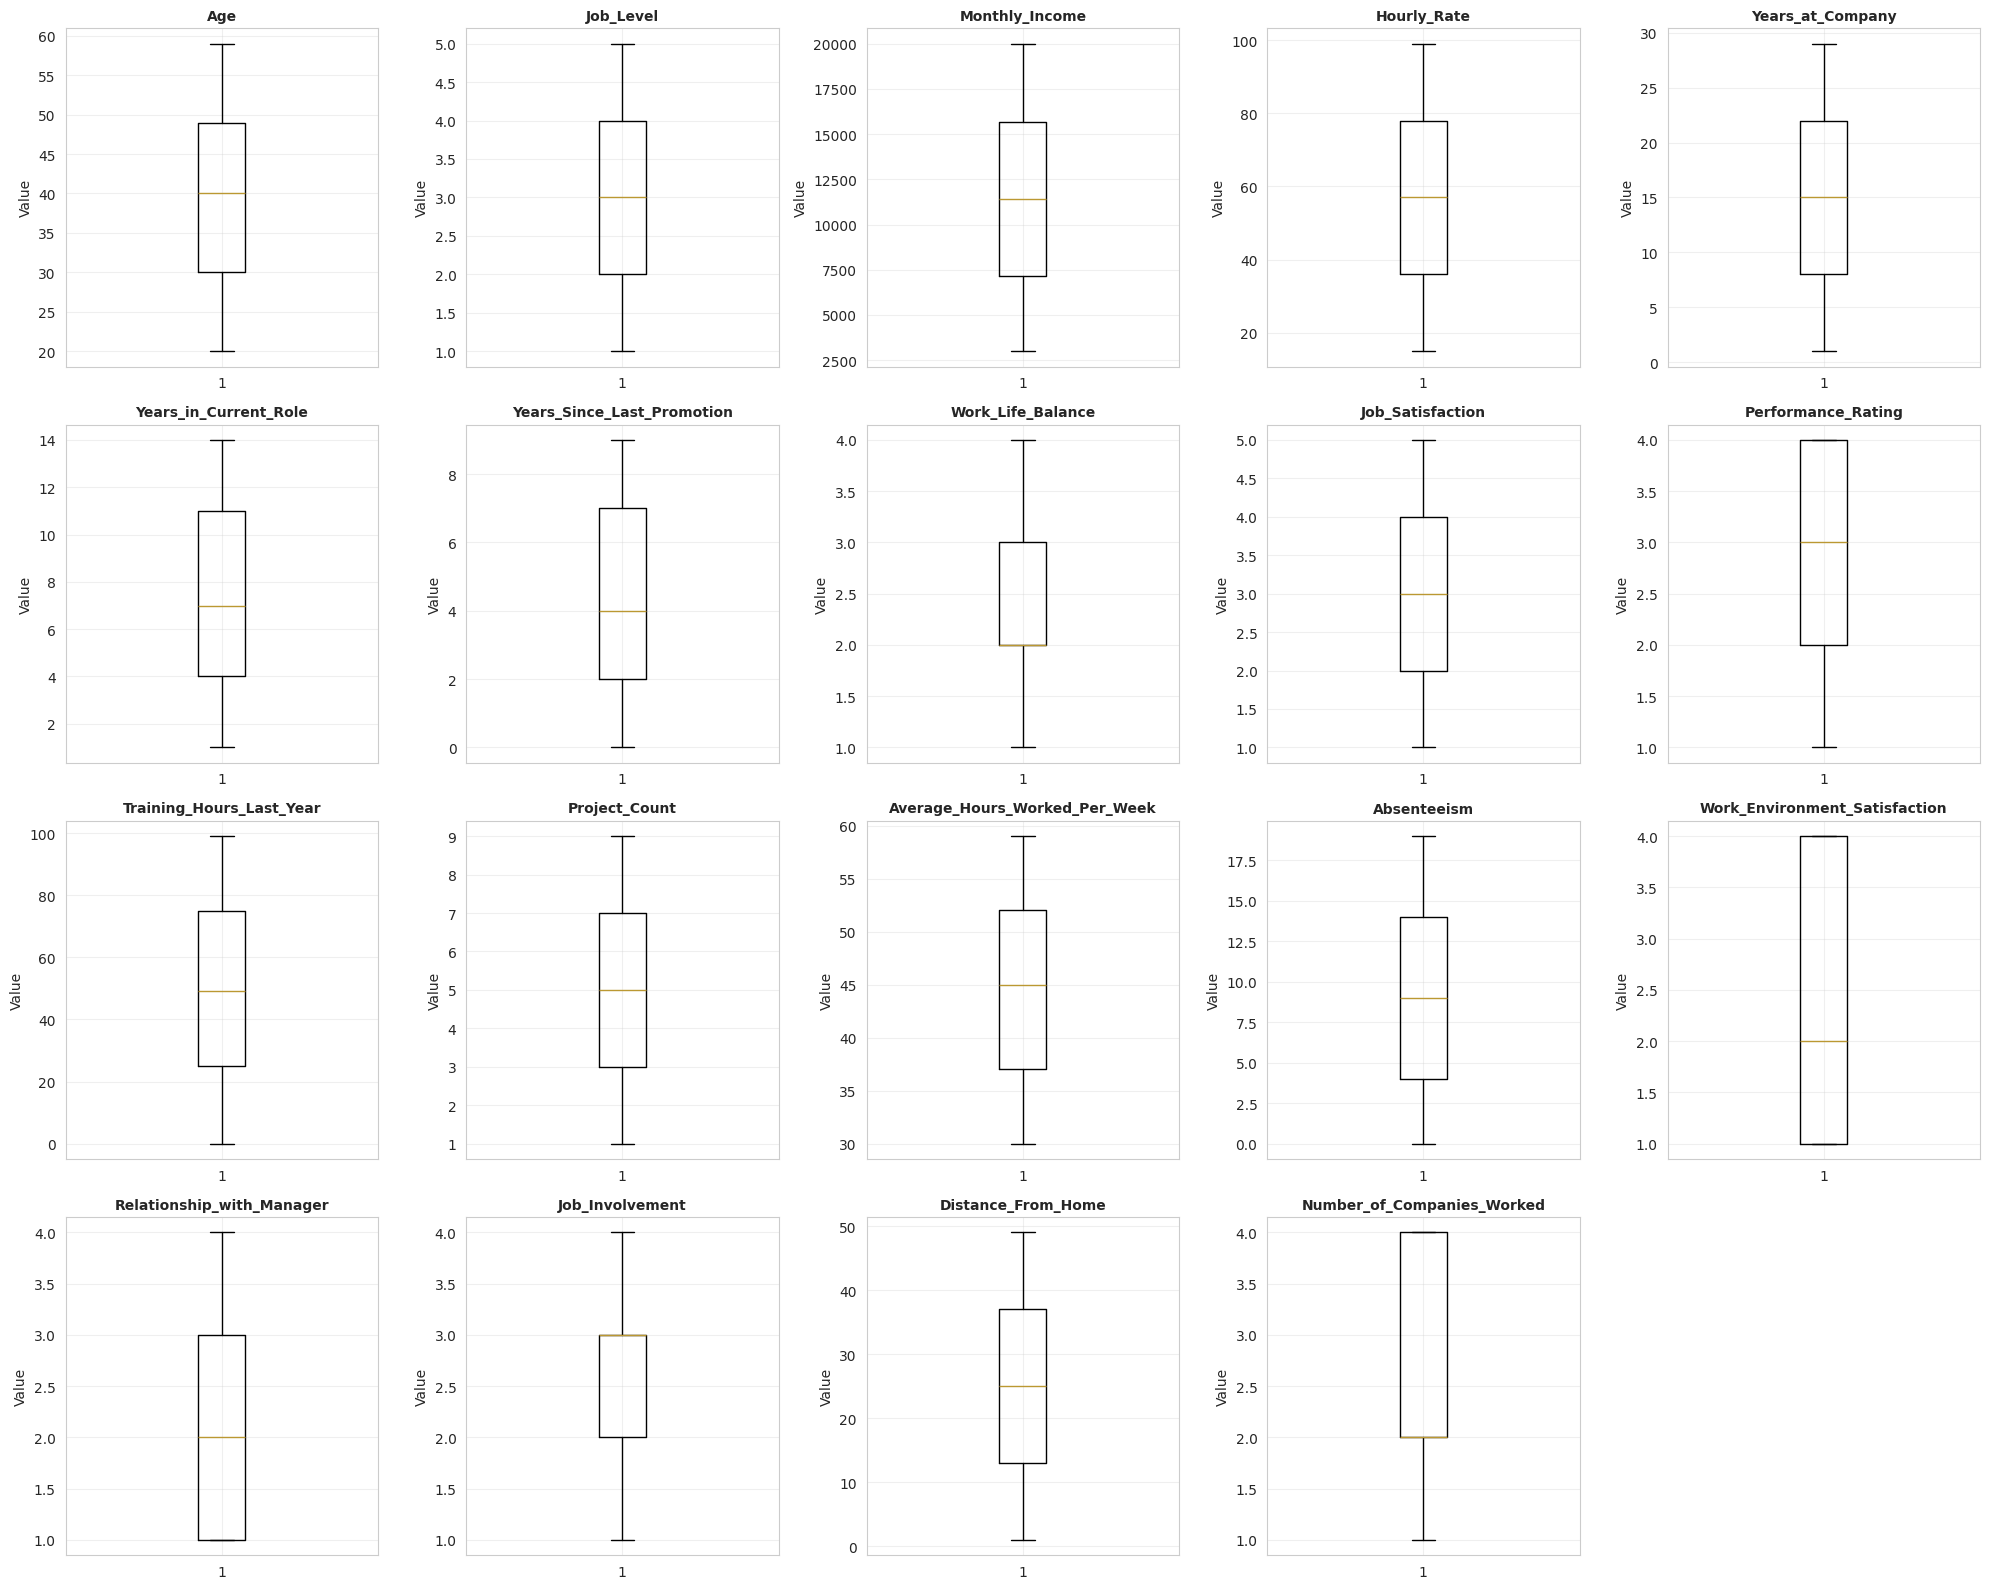

In [ ]:
#Data pre-processing
print(f"\nDATA PRE-PROCESSING")
#creating a copy of df for data pre-processing
df_processed = df.copy()

#1. Missing values
print("Missing values per class:")
print(df.isnull().sum())

#2. Check duplicate values
print(f"\nNo of duplicate values in the dataset: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    print("Removing duplicate values in the dataset...")
    df = df.drop_duplicates()
    print(f"Processed df shape: {df.shape}")

#3. Outlier detection using IQR method
print("\nOutlier detection using IQR method")
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('Employee_ID')

outlier_summary = {}
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_processed[(df_processed[col] < lower_bound) |
                           (df_processed[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    if len(outliers) > 0:
        print(f"   {col}: {len(outliers)} outliers ({len(outliers)/len(df_processed)*100:.2f}%)")
#Outlier visualisation using box plot
print(f"\nVisualising outliers using box plot graphs:")
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
for i, feature in enumerate(numerical_cols):
    axes[i].boxplot(x=df[feature], vert=True)
    axes[i].set_title(f'{feature}', fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Value')
    axes[i].grid(True, alpha=0.3)
# To remove any unused subplots
for j in range(len(numerical_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



## **2.2) EXPLORATORY DATA ANALYSIS(EDA)**


EXPLORATORY DATA ANALYSIS

Attrition by Department:


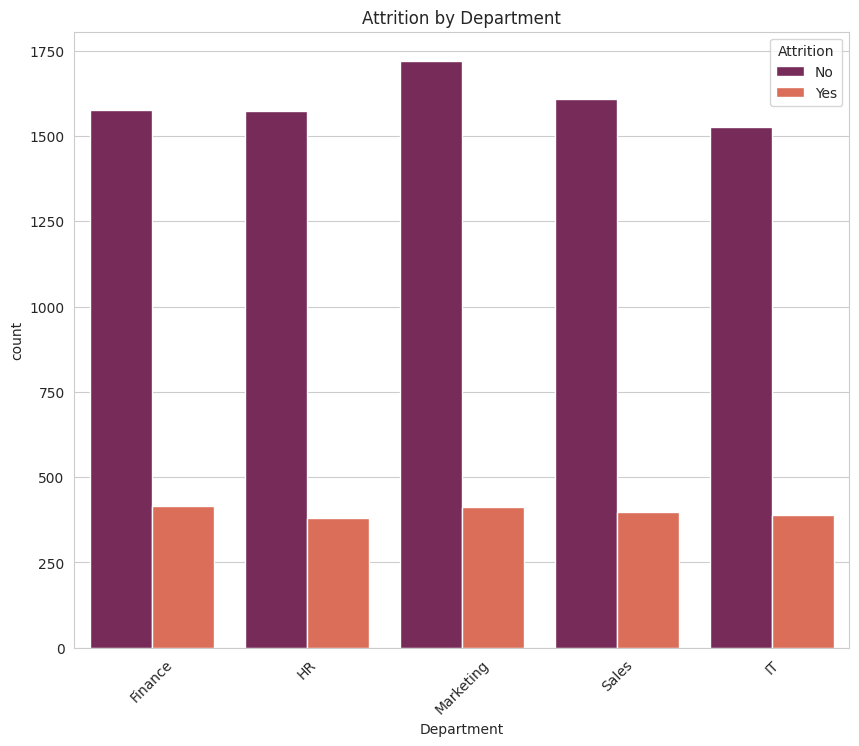


Attrition by Overtime:


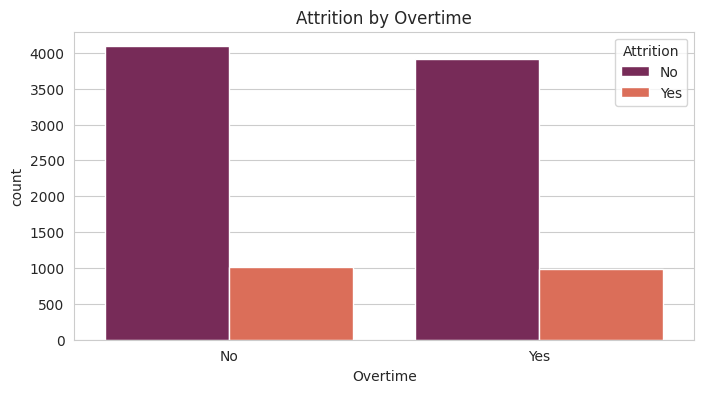


Distribution of Years at Company:


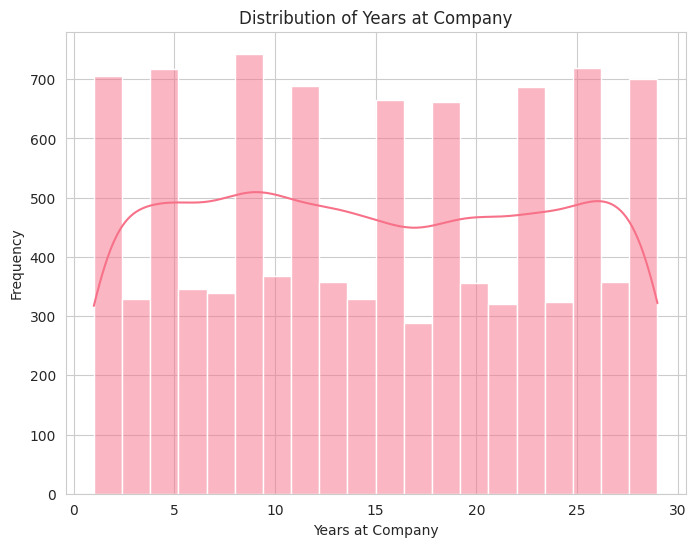


Distribution of Monthly Income by Attrition:


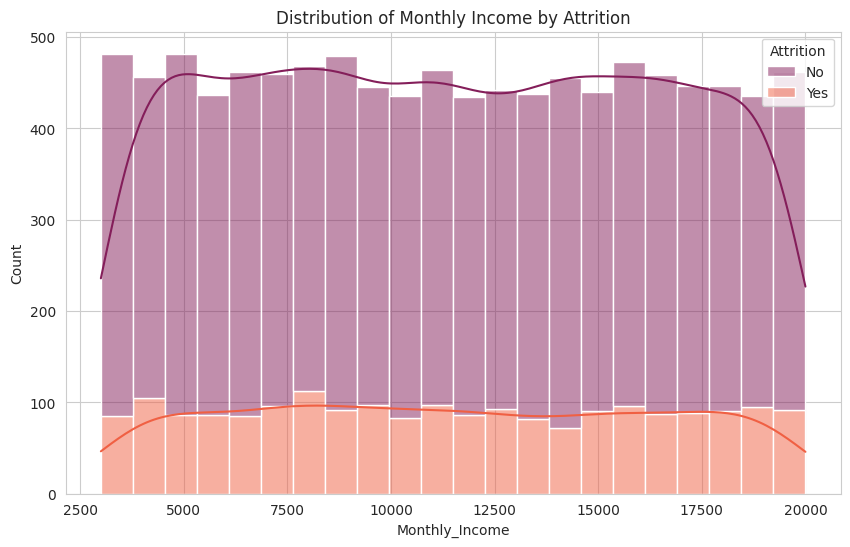


Job Satisfaction Distribution by Attrition:


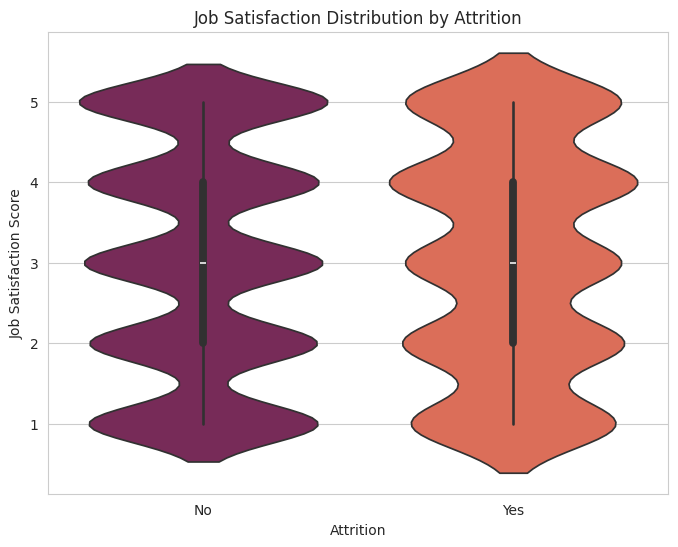


Work-Life Balance Distribution by Attrition:


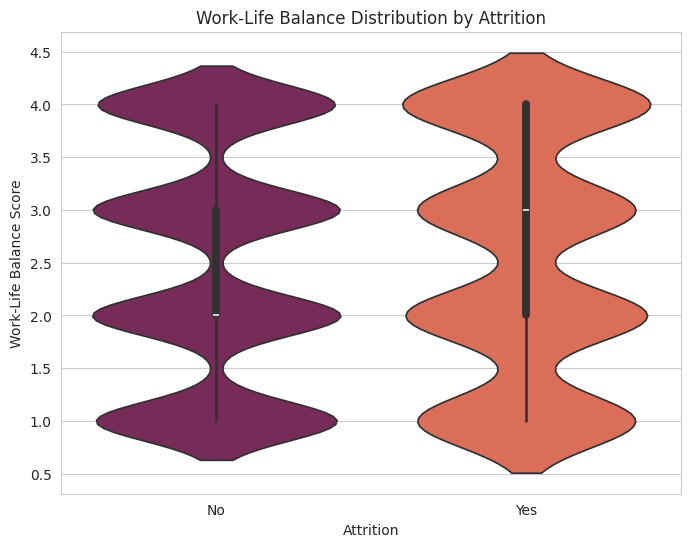

In [ ]:
#Exploratory data analysis
print(f"\nEXPLORATORY DATA ANALYSIS")
#1. attrition by department
print(f"\nAttrition by Department:")
plt.figure(figsize=(10, 8))
sns.countplot(x='Department', hue='Attrition', data=df,palette='rocket')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

#2. attrition by overtime
print(f"\nAttrition by Overtime:")
plt.figure(figsize=(8, 4))
sns.countplot(x='Overtime', hue='Attrition', data=df,palette='rocket')
plt.title('Attrition by Overtime')
plt.show()

#3. Distribution of Years at Company
print(f"\nDistribution of Years at Company:")
plt.figure(figsize=(8, 6))
sns.histplot(df['Years_at_Company'], bins=20, kde=True,palette='husl')
plt.title('Distribution of Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

#4. Distribution of Monthly Income by Attrition
print(f"\nDistribution of Monthly Income by Attrition:")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly_Income', hue='Attrition', kde=True, multiple="stack",palette='rocket')
plt.title('Distribution of Monthly Income by Attrition')
plt.show()

#5. Job Satisfaction Distribution by Attrition
print(f"\nJob Satisfaction Distribution by Attrition:")
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Attrition', y='Job_Satisfaction',palette='rocket',inner='box')
plt.title('Job Satisfaction Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction Score')
plt.show()

#6. Work-Life Balance Distribution by Attrition
print(f"\nWork-Life Balance Distribution by Attrition:")
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Attrition', y='Work_Life_Balance', inner='box',palette='rocket')
plt.title('Work-Life Balance Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Work-Life Balance Score')
plt.show()



## **2.3) CORRELATION ANALYSIS | FEATURE ENGINEERING**


MULTICOLLINEARITY ANALYSIS

Label Encoding:


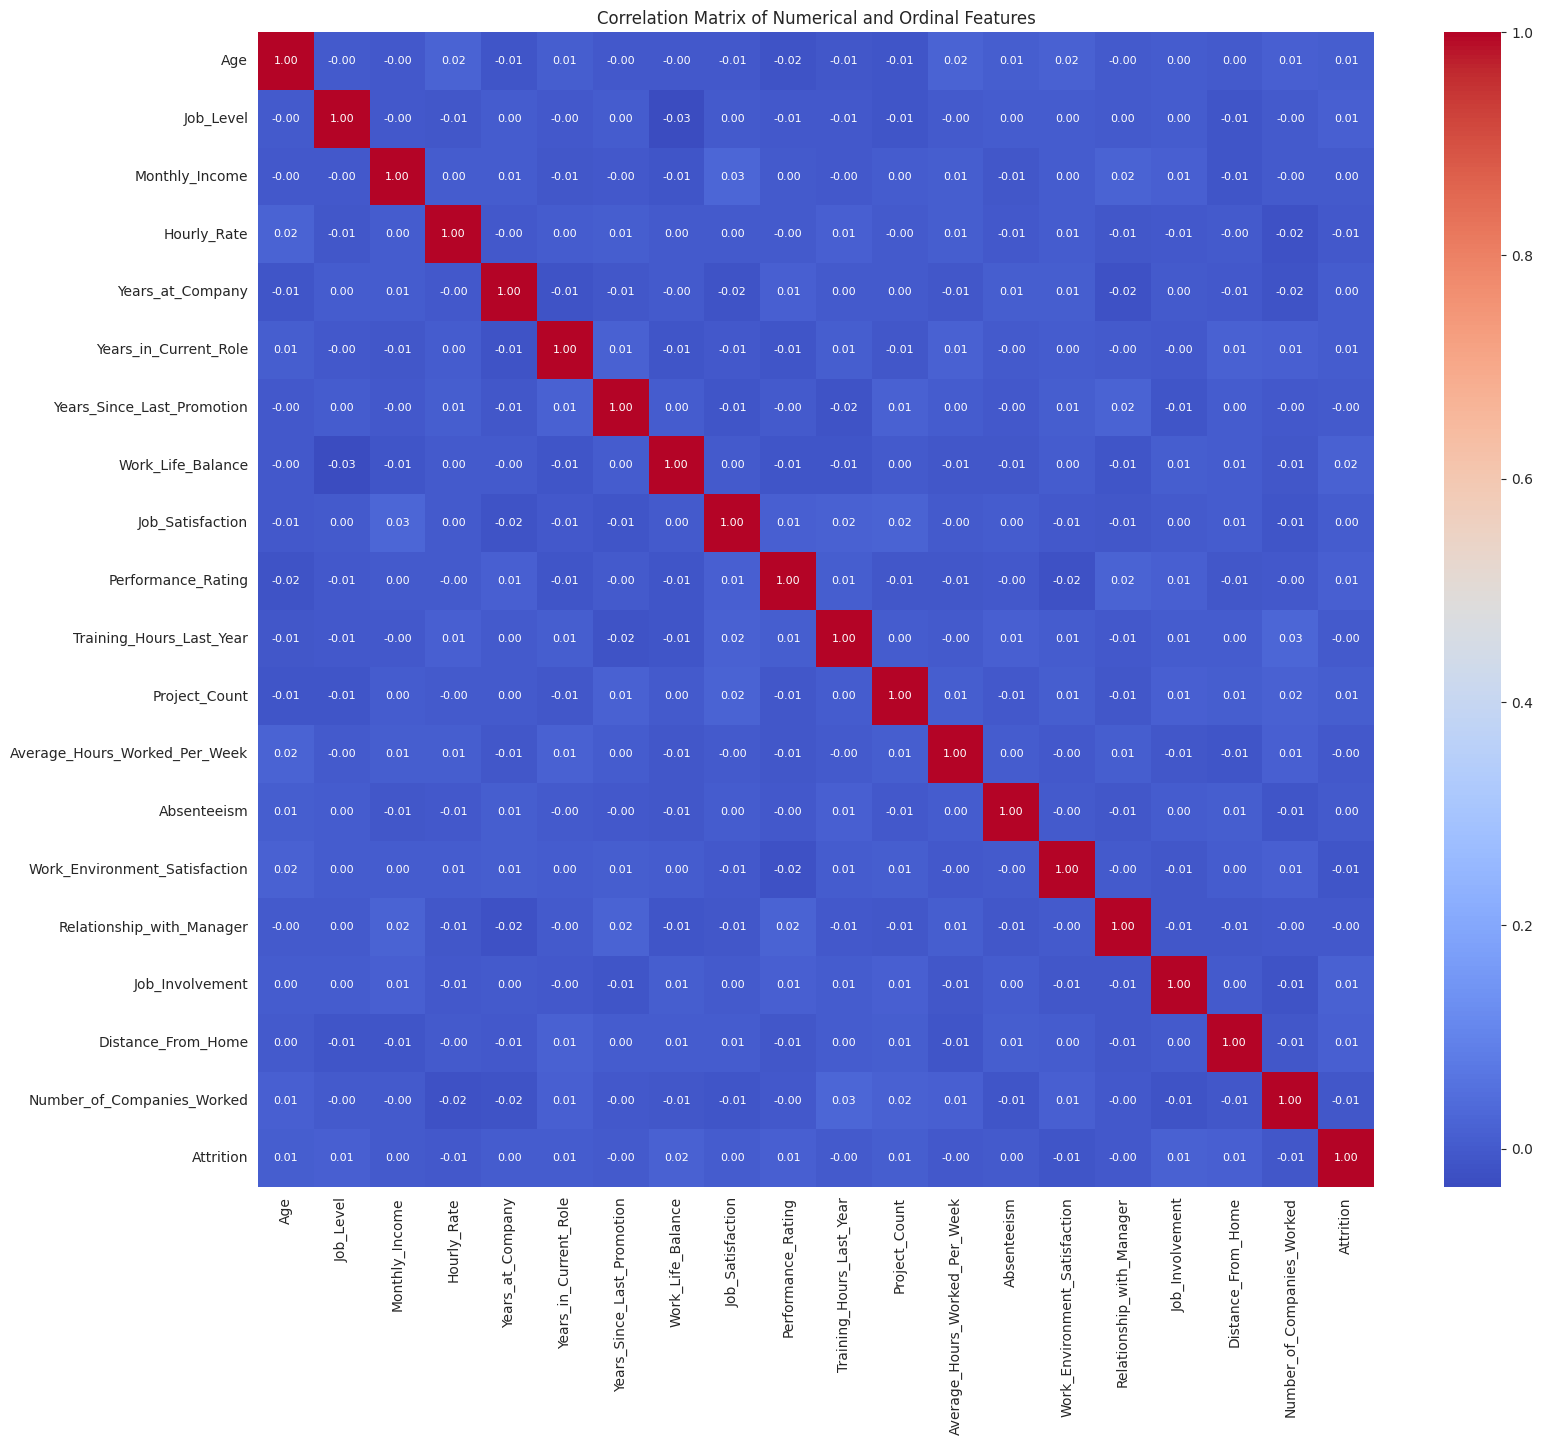


Top 10 Features Correlated with Attrition:
Work_Life_Balance        0.015227
Job_Involvement          0.014954
Performance_Rating       0.011856
Job_Level                0.011415
Distance_From_Home       0.011361
Age                      0.007798
Project_Count            0.006802
Years_in_Current_Role    0.005120
Years_at_Company         0.002682
Job_Satisfaction         0.002142
Name: Attrition, dtype: float64

FEATURE ENGINEERING
Data is splitted into 80% train (8000 samples) and 20% test (2000 samples).

Class Weights were calculated for imbalance handling: 
  Class 0 (No Attrition): 0.625
  Class 1 (Attrition): 2.504

No of Features before selection: 24

1. FILTER METHOD: SelectKBest
Selected 20 features using Filter method (selectKbest)
                       Feature   F-Score
23  Number_of_Companies_Worked  3.115842
21             Job_Involvement  2.616365
5                    Job_Level  2.547316
22          Distance_From_Home  2.195463
4                     Job_Role  1.967284
1

In [ ]:
#Multi-Collinearity Analysis
print(f"\nMULTICOLLINEARITY ANALYSIS")
df_encoded=df_processed.copy()
#Label Encoding
print("\nLabel Encoding:")
label_encoders = {}
for col in categoricalFeatures:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le
df_encoded=df_encoded.drop('Employee_ID', axis=1)
numericalFeatures.remove('Employee_ID')
#Correlation matrix
features_corr = numericalFeatures + ['Attrition']
corrMatrix = df_encoded[features_corr].corr()

#Correlarion Heatmap plotting
plt.figure(figsize=(18, 15))
sns.heatmap(corrMatrix, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical and Ordinal Features')
plt.show()

corrFeatures = corrMatrix['Attrition'].sort_values(ascending=False)
print("\nTop 10 Features Correlated with Attrition:")
print(corrFeatures.head(11)[1:])


#Feature engineering
print(f"\nFEATURE ENGINEERING")
X = df_encoded.drop(['Attrition'], axis=1)
y = df_encoded['Attrition']

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)
print(f"Data is splitted into 80% train ({X_train.shape[0]} samples) and 20% test ({X_test.shape[0]} samples).")

#class weigths method for handling class imbalance
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(df_encoded['Attrition']),
    y=df_encoded['Attrition']
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"\nClass Weights were calculated for imbalance handling: ")
print(f"  Class 0 (No Attrition): {class_weights[0]:.3f}")
print(f"  Class 1 (Attrition): {class_weights[1]:.3f}")


# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print(f"\nNo of Features before selection: {X.shape[1]}")

#Filter method : selectKbest
print("\n1. FILTER METHOD: SelectKBest")
#selecting top 15 features
k_best = SelectKBest(score_func=f_classif, k= 20)
k_best.fit_transform(X_train_scaled, y_train)
filter_scores = pd.DataFrame({'Feature': X.columns,'F-Score': k_best.scores_}).sort_values('F-Score', ascending=False)
selected_features_filter = X.columns[k_best.get_support()].tolist()
print(f"Selected {len(selected_features_filter)} features using Filter method (selectKbest)")
print(filter_scores.head(15).to_string())

#2. Embedding Method: L1 Regularization (Lasso)
print("\n2. EMBEDDING METHOD: L1 Regularization (Lasso)")
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.5, random_state=42)
selector_embedded = SelectFromModel(lr_l1, threshold='median')
X_embedded = selector_embedded.fit_transform(X_train_scaled, y_train)
#selecting top features
selected_features_embedded = X.columns[selector_embedded.get_support()].tolist()
coef_df = pd.DataFrame({'Feature': X.columns,'Coefficient': np.abs(lr_l1.fit(X_train_scaled, y_train).coef_[0])}).sort_values('Coefficient', ascending=False)
print(f"\nSelected {len(selected_features_embedded)} features using Embedded method(L1 Regularization)")
for i, f in enumerate(selected_features_embedded, 1):
    print(f"  {i}. {f}")


#3. Wrapper method:  Recursive Feature Elimination (RFE)
print("\n3. WRAPPER METHOD:  Recursive Feature Elimination (RFE)")
# using Random forest for estimation
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rfe_selector = RFE(estimator=rf_model, n_features_to_select=15, step=1)
X_wrapper = rfe_selector.fit_transform(X_train_scaled, y_train)
# Get selected features
selected_features_wrapper = X.columns[rfe_selector.support_].tolist()
feature_ranking = pd.DataFrame({'Feature': X.columns,'Ranking': rfe_selector.ranking_}).sort_values('Ranking')
print(f"Selected {len(selected_features_wrapper)} features using Wrapper method(RFE)")
print("\nSelected Features:")
for i, f in enumerate(selected_features_wrapper, 1):
    print(f"  {i}. {f}")

#Common features across all methods
all_features = set(selected_features_filter) | set(selected_features_wrapper) | set(selected_features_embedded)
common_features = set(selected_features_filter) & set(selected_features_wrapper) & set(selected_features_embedded)
print(f"\nTotal no of unique features selected by all methods: {len(all_features)}")
print(f"Features selected by all three methods: {len(common_features)}")
if common_features:
    print("\nCommon features selected across all methods:")
    for f in common_features:
        print(f" {f}")

# Final feature selection
#I am proceeding with Wrapper method : RFE selected features as they are more reliable
final_features = selected_features_wrapper
print(f"\nFinal features selected for model training: {len(final_features)} using RFE method")

## **Q2 ANALYSIS:**
# 1.   **In each category, what techniques did you use?**
**Answer:**
The techniques that I implemented in:

1.   **Data pre-processing:**


  *  Missing Value Check
  *  Duplicate Value Check
  *  Outlier detection
  *  Label encoding
  *  Feature scaling
  *  Class Imbalance Handling


2.  **EDA:**


*    Attrition by department(Countplot)
*   Attrition by overtime(Countplot)
* Distribution of Years at Company (histogram)
* Distribution of Monthly Income by Attrition(histogram)
* Job Satisfaction Distribution by Attrition(Violin)
* Work-Life Balance Distribution by Attrition(Violin)
* Correlation Heatmap

3. **Feature Engineering:**
* 1. Filter Method: SelectKBest with ANOVA F-statistic
* 2. Embedded Method: L1 Regularization (Lasso)
* 3. Wrapper Method: Recursive Feature Elimination (RFE)

# 2.   **Discuss briefly what did you use ?**
**Answer:**
1.   **Missing Value Check:** First, the presence of missing values is checked using `df.isnull()`, and I found that there are `no missing values`. So, there is no need for any imputation methods for handling.
2.   **Duplicate Value Check:** I checked for duplicate values using `df.duplicated()` and found `no duplicate records`.
3. **Outlier Detection:** I implemented **IQR method** to detect and **Box plot** to visualise the outliers present in the dataset. And I found `no outliers` which is unusal. `Must have been pre cleaned or company might not have allowed extreme values`.
4. **Label Encoding:** `LabelEncoder()` is used to encode 6 categorical features *(Gender, Marital_Status, Department, Job_Role, Overtime, Attrition)*.
5. **Feature Scaling:** Features were scaled using `standard scaler`.This technique scales all features to have a mean of 0 and a standard deviation of 1. I fit the scaler only on the training data and then used it to transform both the training and test sets to prevent data leakage.

**EDA analysis:**


*  I noticed a high `class imbalance`. NO Attrition: 8,003 samples (80.03%) & YES Attrition: 1,997 samples (19.97%)
*   **Attrition by department:** I used `Countplot` to plot `Attrition vs department`. I observed a `consistent attrition rate(~20-25%)` across all departments.
* **Attrition by overtime:** Again I have used the `Countplot` to plot `Attrition by overtime`. I almost observed  `~50% attrition rate` for both. But the key finding is that `employees without overtime` have `lower attrition rate(~20%)`.
* **Distribution of Years at Company:** `Histogram` along with `KDE` is used for plotting `Distribution of Years at Company`. I found out that `Most attrition likely occurs in first 5 years`.
* **Distribution of Monthly Income by Attrition:** It is plotted using `Histogram` along with `KDE`. `Lower income employees show higher attrition` and *income range 2500 - 7500(usd) shows highest attrition concentration*.
* **Job Satisfaction Distribution by Attrition:** The graph `Job Satisfaction Distribution by Attrition` is plotted using `Violin plot`. I see almost similar distributions between groups. Slight tendency toward lower satisfaction in attrition group which is normal.
* **Work-Life Balance Distribution by Attrition:** Again this is plotted using `Violin plot`. Employees who leave show slightly lower work-life balance scores which is expected again.

# 3.   **Please be sure for data pre-processing, address all possible approaches.**
**Answer:** I guess, I have implemented all data pre-processing approaches and addresed them in the above analysis questions. Their results have also been discussed in the answers above.

# 4.   **What feature engineering did you use? Use 1 filtering, 1 embedding and 1 wrapping.**
**Answer:**

1.   **Filter Method:** I decided to implement `SelectKBest` filter method with `ANOVA F-statistic`.This method analyzes each feature individually against the target variable and selects top `15 featurers`.

2.  **Embedding Method:** Implemented `L1 Regularization` method and selected features with non-zero coefficients. Prevents overfitting while selecting features.

3. **Wrapper Method:** I used `Recursive Feature Elmination(RFE)` with `Random forest` as an estimator. This method "wraps" the model, training it, removing the least important feature, and repeating the process until only the desired number (15) of features remain.

# 4.1.   **What do you learn from this?**
**Answer:** I primarly, noticed that different methods select different subsets of features. And `7 common features Job_Level, Distance_From_Home, Work_Life_Balance, Hourly_Rate, Department Years_at_Company and Age ` have been selected across all three methods. Implying they are key features for predection. I observed that `RFE` method gave the most impactful subset for model training. So, I selected the 15 features selected in RFE method.

# 4.2.   **Can you analyze multi-collinearity results?**
**Answer:**
* I did'nt observe any multi-collinearity features > 0.7, implying all fearutres are relatively independent.
* Low to moderate multicollinearity detected.
* No single feature strongly predicts attrition linearly, which made me decide to use non linear models like Random Forest, Gradient Boosting or XGBoost for model training.


#4.3. **How many features you started your training process? Removing any features?**
**Answer:**


*  I started with `25 features` [excluding Employee_ID and including attrition].
*   After feature selection, I removed `10 features`.
* I am moving forward with the `15 features` selected by `RFE` method.
* This reduction, elminates the unecessary features, reduces risk of overfitting and increase the speed of model training.









---
## **Q3) TRAINING AND TESTING:**

Training dataset shape: (8000, 15)
Testing dataset shape: (2000, 15)
Class distribution in training: {0: 6402, 1: 1598}

MODELS SELECTED: Logistic Regression, Gradient Boosting and XGBoost

Training LR model
  Training Accuracy: 0.5180
  Testing Accuracy: 0.4985
  Testing Recall: 0.4787
  Testing Precision: 0.1937
  Testing F1-Score: 0.2758
  Testing Roc-Auc: 0.4934

Training GB model
  Training Accuracy: 0.7869
  Testing Accuracy: 0.5955
  Testing Recall: 0.2857
  Testing Precision: 0.1787
  Testing F1-Score: 0.2199
  Testing Roc-Auc: 0.4729

Training XGB model
  Training Accuracy: 0.6784
  Testing Accuracy: 0.4720
  Testing Recall: 0.5188
  Testing Precision: 0.1933
  Testing F1-Score: 0.2816
  Testing Roc-Auc: 0.4971


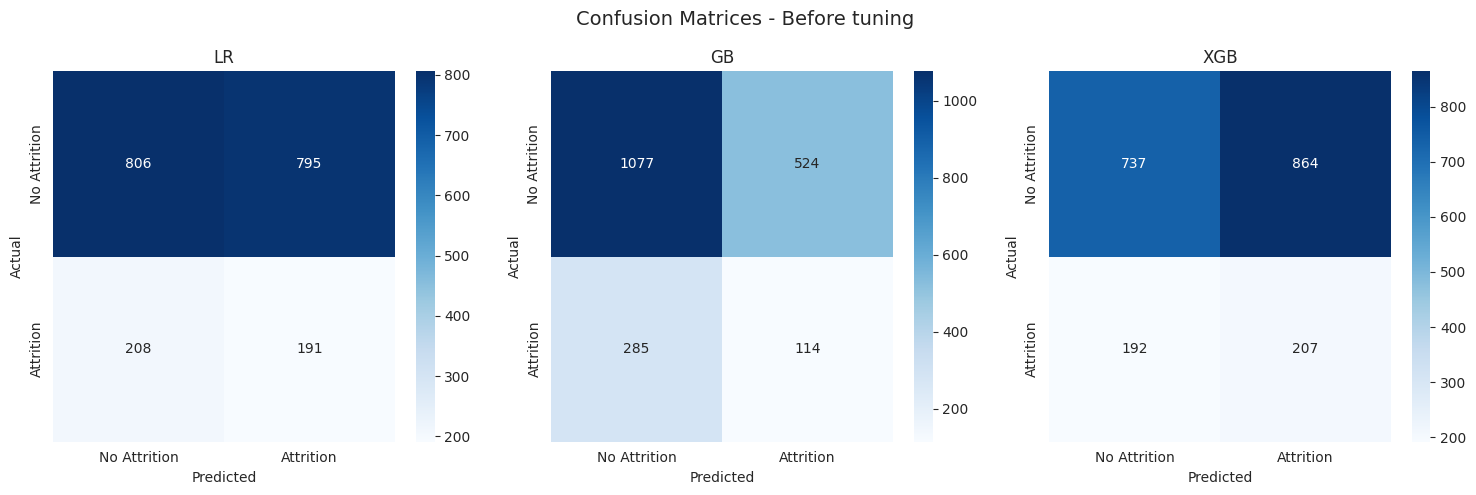

      Actual  LR  GB  XGB
7747       0   1   0    0
2580       0   0   0    1
6033       0   1   0    0
1485       0   1   0    0
2715       0   1   1    1
1258       0   1   0    1
3018       0   1   1    1
8834       0   1   0    0
1431       0   0   0    0
123        0   0   0    0


In [ ]:
#Training and testing
#This project fall under Classification supervised learning
#using the selected 15 featurers for model training and testing
X_train_final = X_train_scaled[final_features]
X_test_final = X_test_scaled[final_features]
# Training and testing
print(f"Training dataset shape: {X_train_final.shape}")
print(f"Testing dataset shape: {X_test_final.shape}")
print(f"Class distribution in training: {y_train.value_counts().to_dict()}")

# Model development
print(f"\nMODELS SELECTED: Logistic Regression, Gradient Boosting and XGBoost")

models = {
    'LR': LogisticRegression(

        C=1.0,
        max_iter=1000,
        solver='lbfgs',
        class_weight='balanced',
        random_state=42
    ),

    'GB': GradientBoostingClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        random_state=42
    ),
    'XGB': xgb.XGBClassifier(
        n_estimators=50,
        learning_rate=0.1,
        max_depth=6,
        scale_pos_weight=5.25)
}

trained_models = {}
training_results = {}

for name, model in models.items():
    print(f"\nTraining {name} model")

    if name == 'GB':
        sample_wts = class_weight.compute_sample_weight('balanced', y_train)
        model.fit(X_train_final, y_train, sample_weight=sample_wts)
    else:
        model.fit(X_train_final, y_train)

    # Making predictions
    y_pred_train = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)
    y_pred_proba_test = model.predict_proba(X_test_final)[:, 1]

    # Metric evaluation
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy: {test_acc:.4f}")
    print(f"  Testing Recall: {test_recall:.4f}")
    print(f"  Testing Precision: {test_precision:.4f}")
    print(f"  Testing F1-Score: {test_f1:.4f}")
    print(f"  Testing Roc-Auc: {roc_auc_score(y_test, y_pred_proba_test):.4f}")

    trained_models[name] = model
    training_results[name] = {
        'y_pred_train': y_pred_train,
        'y_pred_test': y_pred_test,
        'y_pred_proba_test': y_pred_proba_test,
        'roc_auc': roc_auc_score(y_test, y_pred_proba_test),
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'test_recall': test_recall,
        'test_precision': test_precision,
        'test_f1': test_f1
    }
#confusion matrix visualisation
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Confusion Matrices - Before tuning', fontsize=14)

for idx, (name, results) in enumerate(training_results.items()):
    cm = confusion_matrix(y_test, results['y_pred_test'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                ax=axes[idx], cbar=True)
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xticklabels(['No Attrition', 'Attrition'])
    axes[idx].set_yticklabels(['No Attrition', 'Attrition'])

plt.tight_layout()
plt.show()

#sample predections
sample_indices = X_test_final.index[:10]
sample_predictions = pd.DataFrame(index=sample_indices)
sample_predictions['Actual'] = y_test.loc[sample_indices]

for name, model in trained_models.items():
    sample_pred = model.predict(X_test_final.loc[sample_indices])
    sample_predictions[name] = sample_pred

print(sample_predictions)

## **Q3 ANALYSIS:**
# 1.   **From categories of Classification supervised learning, Regression supervised learning or unsupervised learning, select three models.**
**Answer:**

*   My project **Employee Attrition Prediction** falls under **Classification Supervised Learning** category.
*   After looking at collinearity analysis I understood that linear models wont detect the complex patterns as there collinearity score is too low(~0.015227). But I wanted to select one linear model and notice the differences.
* 3 Models that I selected:
      
    1. **Logistic Regression:** Linear classifier baseline model.
    2.  **Gradient Boost:** Sequential ensemble bossting classifier model.
    3. **XG Boost:** Advanced gradient boosting classifier model.

# 2.   **Develop these three models, using proper parameters.**
**Answer:**

I developed all `3 models successfully` using the following parameters. All 3 models were implemented good starting parameters such as  and added `class_weight = balanced` for data imbalancing in `Logistic Regression`. And wrote `sample_weights` method for data handling in `Gradient Boosting`. `scale_pos_weight` parameter is used for imbalance handling in `XGBoost`. All models were trained on 8000 samples with 15 RFE selected features.


# 3.   **What does these parameters mean? What values you set?**
**Answer:**

**Parameters:** Parameters are internal variables, which determine how the model should transform input data into output predections.



1.   **Logistic Regression Parameters:**
    
  *   `C=1.0`:  Inverse of the regularization strength.
*   `max_iter=1000`: Max number of iterations that will be performed by model to find a solution.
* `solver='lbfgs'`: Optimization algorithm.
* `class_weight='balanced'`: It automatically adjusts weights inversely proportional to the class frequencies in the data for class imbalance handling.
* `random_state=42:` Sets a seed for the random number generator for shuffling data.


2.   **Gradient Boosting:**
* `n_estimators=100`: It defines the number of boosting stages and decision trees to be build.
* `learning_rate=0.1`: It shrinks the contribution delievered by each decision tree in boosting stage.
* `max_depth=5`: This defines the max depth of each tree.
* `subsample=0.8`: Number of samples that need to be used to fit the tree.
* `random_state=42:` Sets a seed for the random number generator for shuffling data.

3. **XGBoost:**
* `n_estimators=100`: It defines the number of boosting stages and decision trees to be build.
*  `learning_rate=0.1`: It shrinks the contribution delievered by each decision tree in boosting stage. Lower the learning rate, reduces the

*   List item
*   List item

chance of overfitting.
* `max_depth=6`: This defines the max depth of each tree.
* `scale_pos_weight=5.25`: This is used to
control postive weights/negative weights ratio for class imbalance handling.


# 4.   **Predection Analysis?**
**Answer:**



*   All models successfully made predictions.
*   LR:  Moderate recall (47.68%) but lowest precision (19.7%). Predicts more attrition cases but with many false positives.
*   GB:  GB achieved high accuracy(59%) on test data out of all.
*   XGB: XGB has the highest recall(51%). And also achieved the highest F1 score(28%).
* Let's see if we there is an upliftment in metrics after **Hyperparameter tuning**.





---
## **Q4) HYPERPARAMETER TUNING:**

In [ ]:
# Hyperparameter tuning
print(f"\n HYPERPARAMETER TUNING")
print("Selected Technique: Grid Search with 5-Fold Cross-Validation")
# Defining models and parameter grids
param_grids = {
    'LR': {
        'C': [0.01, 0.1, 1],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [1000],
        'class_weight': ['balanced']
    },
    'GB': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [ 0.05, 0.1,0.2],
        'max_depth': [3, 5, 7],
         'subsample': [0.6, 0.8]
    },
    'XGB': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1,0.2],
        'max_depth': [3, 5, 7],
        'scale_pos_weight': [4, 5.25, 6]
    }
}

print("\nParameter Grids of models:")
for model_name, params in param_grids.items():
    print(f"\n{model_name}:")
    for param, values in params.items():
        print(f"   {param}: {values}")

#Performing grid search and evaluate models
tuned_models = {}
best_params = {}
cv_scores = {}

print(f"\nGRID SEARCH:")

for name in models.keys():
    print(f"\nTuning {name}...")


    if name == 'LR':
        base_model = LogisticRegression(random_state=42)
    elif name == 'GB':
        base_model = GradientBoostingClassifier(random_state=42)
    else:
        base_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

    # Grid search with F1 as scoring
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grids[name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )

    #  GB  sample weights handling
    if name == 'GB':
        sample_weights = class_weight.compute_sample_weight('balanced', y_train)
        grid_search.fit(X_train_final, y_train, sample_weight=sample_weights)
    else:
        grid_search.fit(X_train_final, y_train)

    tuned_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_
    cv_scores[name] = {
        'best_score': grid_search.best_score_,
        'mean_test_score': grid_search.cv_results_['mean_test_score'][grid_search.best_index_],
        'std_test_score': grid_search.cv_results_['std_test_score'][grid_search.best_index_]
    }
    print(f"  Best Parameters: {grid_search.best_params_}")
    print(f"  Best CV F1 score: {grid_search.best_score_:.4f}")

# Evaluation metrics
tuned_results = {}

print("\nTUNED MODELS PERFORMANCE")
for name, model in tuned_models.items():
    y_pred_train = model.predict(X_train_final)
    y_pred_test = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]

    tuned_results[name] = {
        'y_pred_test': y_pred_test,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test),
        'recall': recall_score(y_test, y_pred_test),
        'f1': f1_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }

    print(f"\n{name}:")
    for metric, value in tuned_results[name].items():
        if metric not in ['y_pred_test', 'y_pred_proba']:
            print(f"  {metric}: {value:.4f}")



 HYPERPARAMETER TUNING
Selected Technique: Grid Search with 5-Fold Cross-Validation

Parameter Grids of models:

LR:
   C: [0.01, 0.1, 1]
   solver: ['liblinear', 'lbfgs']
   max_iter: [1000]
   class_weight: ['balanced']

GB:
   n_estimators: [50, 100, 150]
   learning_rate: [0.05, 0.1, 0.2]
   max_depth: [3, 5, 7]
   subsample: [0.6, 0.8]

XGB:
   n_estimators: [50, 100, 150]
   learning_rate: [0.05, 0.1, 0.2]
   max_depth: [3, 5, 7]
   scale_pos_weight: [4, 5.25, 6]

GRID SEARCH:

Tuning LR...
  Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}
  Best CV F1 score: 0.2756

Tuning GB...
  Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
  Best CV F1 score: 0.2669

Tuning XGB...
  Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 5.25}
  Best CV F1 score: 0.3322

TUNED MODELS PERFORMANCE

LR:
  accuracy: 0.4990
  precision: 0.1951
  recall: 0.4837
 

## **Q4) ANALYSIS:**
#    **Techniques used in Hyperparameter tuning.**
**Answer:**


*   I have implemented **Grid Search with 5-Fold Cross-Validation**, which exhaustively performs search based on the grid parameters until best set of parameters is found.
*   I chose `F1 score` as my scoring metric.
*  5-Fold Cross-Validation is chosen beacuse it delievers a robust performance.

**Best parameters discoverd for each model are:**
1. Logistic Regression: `{'C': 1, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'liblinear'}`
2. Gradient Boosting: `{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}`
3. XGBoost: `{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 5.25}`

**Key observations made:**
* Minimal improvement in `LR f1 score`.
* Trees of `Gradient boosting` and `XGBoost` became shallow by selecting `depth = 3` implying depth increasing overfitting.
* XGboost achieved high f1sscore at the cost of 96.7% recall.
* In conclusion, hyperparamater tuning with weak features lead to disastours metric evaluations.


---
## **Q5) PERFORMANCE EVALUATION:**

In [ ]:
#Perfomance evaluation of metrics
print(f"\nPERFORMANCE EVALUATION")

#Evaluation metrics comparision
print("Evaluation metrics comparision")

comparison_df = pd.DataFrame({
    'Model': ['LR', 'GB', 'XGB'],
    'Accuracy_Before': [training_results[m]['test_accuracy'] for m in ['LR', 'GB', 'XGB']],
    'Accuracy_After': [tuned_results[m]['accuracy'] for m in ['LR', 'GB', 'XGB']],
    'F1_Before': [training_results[m]['test_f1'] for m in ['LR', 'GB', 'XGB']],
    'F1_After': [tuned_results[m]['f1'] for m in ['LR', 'GB', 'XGB']],
    'ROC_AUC_Before': [training_results[m]['roc_auc'] for m in ['LR', 'GB', 'XGB']],
    'ROC_AUC_After': [tuned_results[m]['roc_auc'] for m in ['LR', 'GB', 'XGB']],
})

print(comparison_df.round(4))

#  Overfitting/Underfitting Analysis
print("\nOVERFITTING/UNDERFITTING ANALYSIS")

for name, model in tuned_models.items():
    y_train_pred = model.predict(X_train_final)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = tuned_results[name]['accuracy']
    gap = train_acc - test_acc

    print(f"\n{name}:")
    print(f"  Training Accuracy: {train_acc:.4f}")
    print(f"  Testing Accuracy: {test_acc:.4f}")
    print(f"  Train-Test Gap: {gap:.4f}")

    if gap > 0.15:
        print("  Status: OVERFITTING ")
        print("  Solution Applied: Reduced complexity through hyperparameter tuning")
    elif test_acc < 0.30:
        print("  Status: MODEL COLLAPSE ")
        print("  Issue: Optimizing F1 led to extreme predictions")
    else:
        print("  Status: Acceptable")

#  Cross-validation
print("\nCROSS-VALIDATION ANALYSIS")

print("\nWithout Cross-Validation (Single Split):")
for name in ['LR', 'GB', 'XGB']:
    print(f"{name}: F1={training_results[name]['test_f1']:.4f}, ROC-AUC={training_results[name]['roc_auc']:.4f}")

print("\nWith 5-Fold Cross-Validation:")
for name in ['LR', 'GB', 'XGB']:
    print(f"{name}: Mean F1={cv_scores[name]['best_score']:.4f}, Std={cv_scores[name]['std_test_score']:.4f}")


# Hyperparameter tuning Impact
print("\n HYPERPARAMETER TUNING IMPACT ")

for name in ['LR', 'GB', 'XGB']:
    before_f1 = training_results[name]['test_f1']
    after_f1 = tuned_results[name]['f1']
    improvement = ((after_f1 - before_f1) / before_f1) * 100 if before_f1 > 0 else 0

    print(f"\n{name}:")
    print(f"  F1-Score: {before_f1:.4f} → {after_f1:.4f} ({improvement:+.1f}%)")
    print(f"  ROC-AUC: {training_results[name]['roc_auc']:.4f} → {tuned_results[name]['roc_auc']:.4f}")


PERFORMANCE EVALUATION
Evaluation metrics comparision
  Model  Accuracy_Before  Accuracy_After  F1_Before  F1_After  ROC_AUC_Before  \
0    LR           0.4985           0.499     0.2758    0.2781          0.4934   
1    GB           0.5955           0.570     0.2199    0.2624          0.4729   
2   XGB           0.4720           0.217     0.2816    0.3302          0.4971   

   ROC_AUC_After  
0         0.4934  
1         0.4879  
2         0.4840  

OVERFITTING/UNDERFITTING ANALYSIS

LR:
  Training Accuracy: 0.5178
  Testing Accuracy: 0.4990
  Train-Test Gap: 0.0188
  Status: Acceptable

GB:
  Training Accuracy: 0.7134
  Testing Accuracy: 0.5700
  Train-Test Gap: 0.1434
  Status: Acceptable

XGB:
  Training Accuracy: 0.2298
  Testing Accuracy: 0.2170
  Train-Test Gap: 0.0128
  Status: MODEL COLLAPSE 
  Issue: Optimizing F1 led to extreme predictions

CROSS-VALIDATION ANALYSIS

Without Cross-Validation (Single Split):
LR: F1=0.2758, ROC-AUC=0.4934
GB: F1=0.2199, ROC-AUC=0.4729
XGB: F

## **Q5 ANALYSIS:**
#   5. **What metrics you used?**
**Answer:**
Metrics used:



*   `Accuracy`: Which tells us the overall correctness
*   `Precision`: Predicted attrition
*    `Recall`:  Actual attrition
*    `F1-Score`: Mean of precision and recall
*    `ROC-AUC`: Area under ROC curve


#  5.1.  **Compare the performance of your three models in terms of these metrics?**
**Answer:**
* `Logistic Regression:` Most stable across metrics with minimal changes but less accuracy as it is linear model it couldn't find complex patterns.
* `Gradient Boosting:` Achieved a low F1 score in the process of balancing precision and recall.
* `XGBoost:` Got the highest F1-Score (0.3302) at the cost of an extremely high Recall (0.9674). With worst accuracy and precision.

#  5.2.  **Did you deal with any overfitting/underfitting issues?**
**Answer:**
* `Logistic Regression:` No overfitting was identified but the model was too simple to predict complex patterns.
* `Gradient Boosting:`Overfitting was observed before hyperparameter tuning but got generalised after tuning.
* `XGBoost:` Model is collapased in the process of optimising F1 score.

#  5.3.  **Did you use any regularization approach?**
**Answer:**
Yes, I have used regularization approaches in models.
* `Logistic Regression:` I used C (the inverse of regularization strength) parameter which implement L2 regularization.
* `Gradient Boosting:` Regularisation was applied by tuning `learning_rate` , `max_depth`, and `subsample`.
* `XGBoost:` Regularisation was applied by tuning `learning_rate` and `max_depth`.
#  5.4.   **Get the results with cross validation and without cross validation for each model, any difference? Discuss the method did you use?**
**Answer:**
The results of all 3 models are almost similar. Implying poor performance is because of data. With Cross validation all 3 model F1 scores got upliftted a bit.

#  5.5.  **Provide the results without using hyperparameter and with hyper parameter, and compare them ?**
**Answer:**
Hyperparameter tuning did a significant job.
* `Logistic Regression:` Just a minor improvement in F1 score.
* `Gradient Boosting:` saw a `20% increase` in its `F1-score (0.2199 to 0.2624)` implying earlier parameters suffered a bit overfitting.
* `XGBoost:` significant 17% increase (0.2816 to 0.3302) in the F1 score but heavily penalizing other metrics.



---


## **Q6 RESULTS ANALYSIS:**
#   6.1 **What did you learn?**
**Answer:**


*   `Weak feature correlations (~ 0.015)` make **predictions impossible**.
*   `High class imbalance` in a **small dataset** will output `worst results`.
* `Oversampling` using techniques like SMOTE won't make much difference when features are useless.
* `Hyperparameter tuning` will make a mininmum impact not great as expected when data is biased.
* I **tested** out `multiple approaches`(class weights, different algorithms, tuning using various paramaters) but none made a significant change as features were not good.

#   6.2 **Did you find any pattern in your models/data ?**
**Answer:**


*   `Top Predictors of this project:` Work-Life Balance,Average_Hours_Worked_Per_Week, Overtime_Yes, Monthly_Income, and Age are the most important features.
*   Intrestingly for an employee `Job_Satisfaction` is secondary when compared to `no of work hours` and `pay`.
* No correlation at all between any features.
* I think `Attrition` is more likely driven by personal factors which were outside company control.

#   6.3 **Provide few key points that you learned from your results. ?**
**Answer:**
* No model turned out be best in all metrics.
* F1 score optimisation will lead to castrophic results when features are weak.
* ROC-AUC score (~0.49) indicates random level performance which is bad.
* Dataset limitation led to causes poor performance though proper modelling approch were used.

## 6.4 **CONCLUSION:**

I want to start my conclusion with my intial assumption which turned out to be completely wrong, though the dataset has good number of features(26 in this case) will not yield in good predections until uless they are not redundant and related to the target variable closely. Though I successfully developed relevant models and tuned with proper parameters, the predections were not good due to the strength of features and their weak relation with the target variable. In the end, Companies should focus on employee personal features and should ensure the workload and pay is fair and competitive. And attrition depends more on employee personal reasons rather than his/her situation at company.


## **Acknowledgements**:
*I sincerely thank Professor, for the valuable resources and guidance throughout this project, and to all the TAs for their replies at odd times for my assistance when I am stuck. And the documentation blogs on sns and other ML libraries.*

## **A note for grader:**
As the models did not perform well due to the dataset, I discussed this issue with Professor Tala. She advised me to leave a comment indicating that I had discussed the matter with her so the grader or TA is aware. I am attaching a few notebook links showing that training on the same dataset produced similarly low or no scores for the F1 and other metrics.

1. [https://www.kaggle.com/code/devraai/employee-attrition-prediction-analysis#Model-Evaluation](https://www.kaggle.com/code/devraai/employee-attrition-prediction-analysis#Model-Evaluation)

2. [https://www.kaggle.com/code/alimtharwat/employee-attrition-prediction#3.-Model-evaluation:](https://www.kaggle.com/code/alimtharwat/employee-attrition-prediction#3.-Model-evaluation:)

note: the above datasets only concentrated on accuracy, while I concentrated on all metrics also add class_weights as a parameter in training.